# Tasks Description

## Exercise 1  
In this task, we need to create a model of an RLC circuit using the transmittance of the system. The system consists of  
a resistor with resistance \( R \), a capacitor with capacitance \( C \), and an inductor with inductance \( L \). The input  
voltage is \( v_{in}(t) \), and the output voltage \( v_{out}(t) \) is measured at the capacitor.  
<img src="image.png"/>  

**1.1 Impulse response of the RLC circuit**  
For the circuit presented above, the relationship between \( v_{out}(t) \) and \( v_{in}(t) \) was determined in the form of an equation  
analytic in the time domain. The following properties were used:

### Kirchhoff's Current Law (KCL):
$$
i_{R}(t) = i_{L}(t) + i_{C}(t)
$$

### Kirchhoff's Voltage Law (KVL):
$$
v_{in}(t) = i_{R}(t) R + v_{out}(t)
$$

### Parallel connection of \( L \) and \( C \):
$$
v_{out}(t) = v_{C}(t) = v_{L}(t)
$$
  
  
Additionally, the voltage-current relations for each component were applied:

- Resistor:  
  $$
  v_{R}(t) = R \cdot i_{R}(t)
  $$

- Capacitor:  
  $$
  i_{C}(t) = C \cdot \frac{dv_{C}(t)}{dt}
  $$

- Inductor:  
  $$
  v_{L}(t) = L \cdot \frac{di_{L}(t)}{dt}
  $$
  
  
  
The analytical equations were transformed into the Laplace domain to derive the transfer function of the system \( G(s) \), defined as:
$$
G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{L \cdot s}{R L C \cdot s^2 + L \cdot s + R}
$$

The following parameters of the system were used:
- Resistance: \( R = 10 \, \Omega \)
- Capacitance: \( C = 1\*10^-6F)
- Inductance: \( L = 4\*10^-6H)

The impulse response of the system was calculated using the `forced_response` function for a signal that approximates the Dirac delta (impulse).  



### 1.2 Bode plot of the RLC circuit

In this task, the goal is to create the Bode plot of the RLC system based on the Fourier transform  
of the impulse response obtained in the previous step. The frequency response is computed directly from the impulse response  
using the discrete Fourier transform (DFT), allowing the amplitude and phase characteristics of the system to be analyzed.

The results are compared with the theoretical Bode plot generated from the analytical transfer function \( G(s) \).  
The transfer function is implemented using the `TransferFunction` object from the `control` library in Python,  
similarly to the `tf(num, den)` function in MATLAB.

The obtained frequency response confirms that the analyzed system behaves as a band-pass filter.

Additionally, based on the impulse response and the Bode plot, the following parameters are calculated:

- The amplitude-frequency and phase-frequency characteristics for the given excitation.  
- The natural frequency of the system \( \omega_n \).  
- The dimensionless damping coefficient \( \xi \):  
  - \( damping coefficient < 1 \) – underdamped system,  
  - \( damping coefficient = 1 \) – critically damped system,  
  - \( damping coefficient > 1 \) – overdamped system.

Two methods are used to estimate the damping coefficient:

1. **Logarithmic decrement method** (based on the impulse response):  
   $$
   \xi = \frac{\ln{\left(\frac{x_0}{x_1}\right)}}{2\pi}
   $$
   where \( x_0 \) and \( x_1 \) are the amplitudes of two consecutive peaks.

2. **Half-power bandwidth method** (based on the Bode plot):  
   $$
   \xi = \frac{\omega_2 - \omega_1}{2 \omega_r}
   $$
   where \( \omega_1 \) and \( \omega_2 \) are the -3 dB frequencies, and \( \omega_r \) is the resonant frequency.
  


### 1.3 Influence of Resistance on System Damping and Bandwidth

In this task, the Bode plots of the RLC circuit are generated for two different resistance values:  
\( R = 5 Ohm) and \( R = 100 Ohm). The frequency responses are analyzed using the same model as in the previous steps.
 
For each case, the damping coefficient \( \xi \) is calculated using one of the previously applied estimation methods  

The results are then used to describe how the resistance \( R \) affects the damping behavior of the system.  
Finally, the approximate value of resistance \( R \) for which the system reaches critical damping \( (\xi = 1) \) is identified.

The analysis shows the relationship between the resistance value, the damping coefficient, and the bandwidth of the filter.
  

  
### 2.1 System Response to Sinusoidal Excitation and Phase Shift Analysis

In this task, the previously created model is modified by changing the input signal from an impulse to a sinusoidal excitation.  
The sine wave input has an amplitude of 1, and the system parameters are set to:  
R = 10 Ohm,  C = 1\*10^-6F, and L = 4\*10^-6H.

The simulation is carried out for the following excitation frequencies:
- 70 kHz  
- 80 kHz  
- 90 kHz  

The system's output response is analyzed separately for each excitation frequency.  
For each case, the following values are determined:
- The amplitude of the output signal,  
- The phase shift between the input and output signals.

The measured phase shift is then compared with the theoretical phase values obtained from the Bode plot of the system.  
To calculate the phase shift from the time-domain signals, the following relation between time delay \( \Delta t \) and phase shift \( \Delta \varphi \) is used:
$$
\Delta \varphi = 360^\circ \cdot \frac{\Delta t}{T}
$$
where \( \Delta t \) is the time shift between the input and output signals, and \( T \) is the period of the excitation signal.

The results allow verification of the agreement between the time-domain analysis and the frequency response obtained from the theoretical transfer function of the system.
  
  
  
### 2.2 Convolution of the Sinusoidal Signal with the Impulse Response of the RLC System

The goal of this task is to calculate the response of the RLC system to a sinusoidal input signal using the convolution method.  
A sinusoidal signal with a frequency of \( f = 70 kHz \) and amplitude \( A = 1 \) is generated.

The system's impulse response, obtained analytically in Task 1.1, is used for the convolution operation.  
The convolution between the input sinusoidal signal and the impulse response is performed to calculate the output signal of the system.

The result obtained through convolution is then compared with the output from the direct time-domain simulation performed in Task 2.1,  
which used sinusoidal excitation applied directly to the system model.

The comparison allows verification of the consistency between the convolution-based approach and the simulation results,  
confirming the correctness of the system model and its impulse response.


## Exercise 1

### Task 1.1

#### Define the transmittance of the system

In [655]:
import control as ctrl

R = 10
C = 1e-6
L = 4e-6

numerator = [L, 0]
denominator = [R*L*C, L, R]

G_s = ctrl.TransferFunction(numerator, denominator)

print(G_s)

<TransferFunction>: sys[403]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        4e-06 s
------------------------
4e-11 s^2 + 4e-06 s + 10



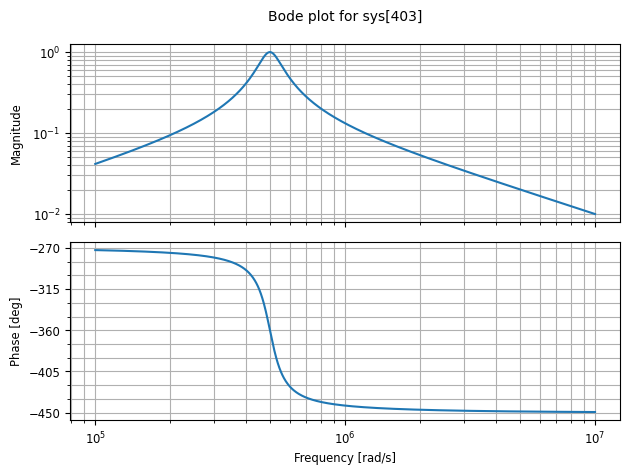

In [656]:
ctrl.bode(G_s)

In [657]:
import numpy as np
import matplotlib.pyplot as plt

fmax = 1e7 / (2*np.pi)
fs = fmax * 4
dt = 1 / fs
step_time = dt

t = np.arange(0, 5e-4, dt)

u = np.ones_like(t)
u[t >= step_time] = 0

Simulink does not use discrete samples but applies a continuous-time solver, which can:

- Interpolate the signal between sample points.  
- Introduce some "energy" in the form of intermediate values, even though the impulse lasts only for a very short time.  
- Instead of simulating true continuous time, they create a very dense time grid (small time step).  
  In this way, the system behaves almost like a continuous-time system.

Due to the fact that this approach is closer to the behavior of a real physical system, it was decided to generate an impulse signal with a duration equal to 2*dt instead of just dt 
In practice, it is not possible to generate a perfect Dirac delta impulse; therefore, rectangular pulses with a very short duration are commonly used as an approximation.

Increasing the width of the impulse improves the quality of the obtained Fourier transform. The signal contains more energy, which results in a more stable frequency response spectrum and a better signal-to-noise ratio.  
As a result, the empirically determined Bode plot shows very good agreement with the theoretical model.


#### Plot the model response on impulse signal

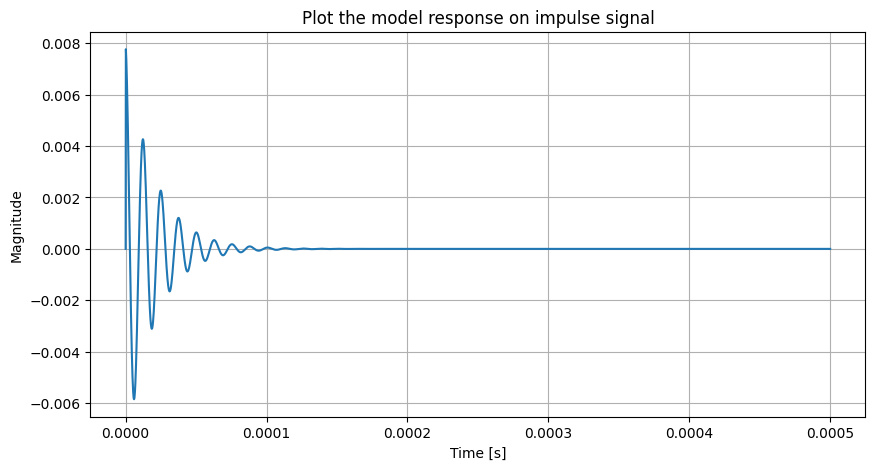

In [658]:
t_out, y_impulse = ctrl.forced_response(G_s, T=t, U=u)
plt.figure(figsize=(10, 5))
plt.plot(t_out, y_impulse)

plt.xlabel('Time [s]')
plt.ylabel('Magnitude')
plt.title('Plot the model response on impulse signal')
plt.grid()

plt.show()

### Task 1.2

In [659]:
from scipy.fft import fft

N = len(t_out)
df = fs / N 
fv = np.arange(0, N) * df

X = fft(u)[:N//2]
Y = fft(y_impulse)[:N//2]
omega = 2 * np.pi * fv[:N//2]  # [rad/s]

H = (Y / X)
H_amp_db = 20 * np.log10(np.abs(H))
H_phase_deg = np.angle(H, deg=True)

In [660]:
mag, phase, omega_model = ctrl.bode(G_s, omega, plot=False)
H_model_amp_db = 20 * np.log10(mag.flatten())
H_model_phase_deg = phase * (180 / np.pi)

c:\Users\miki0\Desktop\Projects\model_ident\myenv\lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
C:\Users\miki0\AppData\Local\Temp\ipykernel_2456\2462089604.py:2: RuntimeWarning: divide by zero encountered in log10
  H_model_amp_db = 20 * np.log10(mag.flatten())


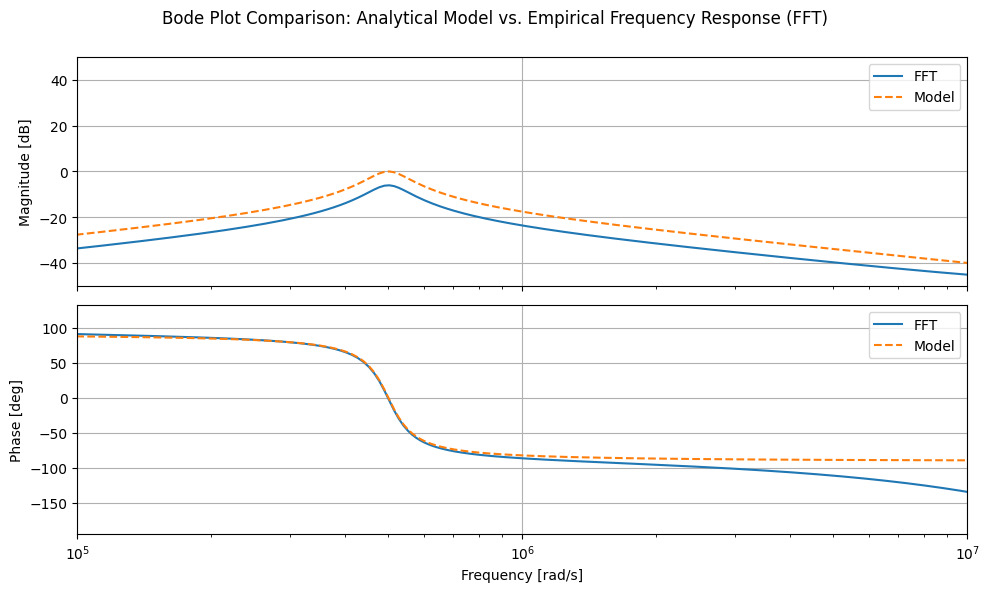

In [661]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].semilogx(omega, H_amp_db, label='FFT')
axes[0].semilogx(omega_model, H_model_amp_db, '--', label='Model')
axes[0].set_ylabel('Magnitude [dB]')
axes[0].set_xlim((1e5, 1e7))
axes[0].set_ylim((-50, 50))
axes[0].grid()
axes[0].legend()

axes[1].semilogx(omega, H_phase_deg, label='FFT')
axes[1].semilogx(omega_model, H_model_phase_deg, '--', label='Model')
axes[1].set_xlabel('Frequency [rad/s]')
axes[1].set_ylabel("Phase [deg]")
axes[1].set_xlim((1e5, 1e7))
axes[1].grid()
axes[1].legend()

fig.suptitle('Bode Plot Comparison: Analytical Model vs. Empirical Frequency Response (FFT)')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


The differences between the analytical Bode plot (obtained using `bode()`) and the one calculated from the FFT result from the fact that `bode()` computes the ideal frequency response of the system,  
while the Fourier transform operates on the real (discrete and time-limited) signal, which does not perfectly represent an ideal Dirac impulse.  
As a result, the empirical frequency response may show small deviations, especially in the amplitude range.


#### Logarithmic decrement method

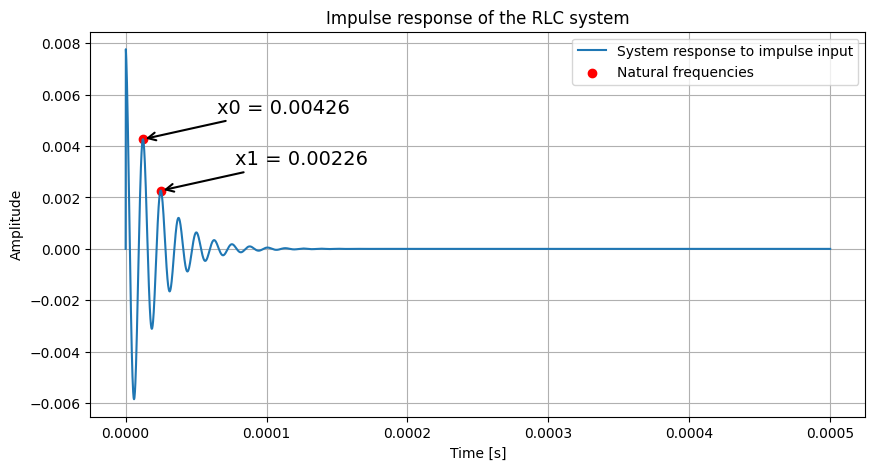

In [662]:
from scipy.signal import find_peaks

t_out, y = ctrl.forced_response(G_s, T=t, U=u)
peaks, _ = find_peaks(y, height=0.001)

plt.figure(figsize=(10, 5))

plt.plot(t_out, y, label='System response to impulse input')
plt.scatter([t_out[peaks[1]], t_out[peaks[2]]], [y[peaks[1]], y[peaks[2]]], c='r', label='Natural frequencies')
for i, peak in enumerate(peaks[1:3]):
    plt.annotate(f'x{i} = {y[peak]:.5f}',
                 xy=(t_out[peak], y[peak]),
                 xytext=(t_out[peak] + 0.0001, y[peak] + 0.001),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
                 fontsize=14,
                 ha='center')
    
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Impulse response of the RLC system')
plt.legend()
plt.grid()

plt.show()


In [663]:
x_0 = y[peaks[1]]
x_1 = y[peaks[2]]

epsilon = np.log(x_0/x_1) / (2*np.pi)
epsilon

np.float64(0.10057701981833589)

#### Half-power bandwidth method

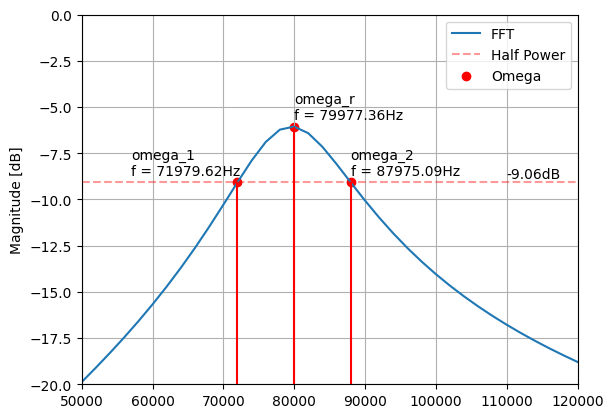

In [664]:
omega_hz = omega / (2*np.pi)

idx_max = np.argmax(H_amp_db)
half_power = H_amp_db.max() - 3

indices = np.where(H_amp_db <= half_power)[0]
omega_1_idx = indices[indices < idx_max][-1]
omega_2_idx = indices[indices > idx_max][0]

omega_r = omega_hz[idx_max]
omega_1 = omega_hz[omega_1_idx]
omega_2 = omega_hz[omega_2_idx]

plt.plot(omega_hz, H_amp_db, label='FFT')
plt.hlines(half_power, 5e4, 12e4, colors='r', linestyles='--', label='Half Power', alpha=0.4)
plt.scatter([omega_r, omega_1, omega_2], [H_amp_db[idx_max], H_amp_db[omega_1_idx], H_amp_db[omega_2_idx]], c='r', label='Omega')
plt.vlines([omega_r, omega_1, omega_2], -20, [H_amp_db[idx_max], H_amp_db[omega_1_idx], H_amp_db[omega_2_idx]], colors='r')
    
plt.text(11e4, half_power+0.2, f'{half_power:.2f}dB')
plt.text(omega_r, H_amp_db[idx_max]+0.4, f'omega_r\nf = {omega_r:.2f}Hz')
plt.text(omega_1-1.5e4, H_amp_db[omega_1_idx]+0.4, f'omega_1\nf = {omega_1:.2f}Hz')
plt.text(omega_2, H_amp_db[omega_2_idx]+0.4, f'omega_2\nf = {omega_2:.2f}Hz')

plt.ylabel("Magnitude [dB]")
plt.xlim((5e4, 12e4))
plt.ylim((-20, 0))
plt.grid()
plt.legend()

In [665]:
epsilon = (omega_2-omega_1) / (2*omega_r)
epsilon

np.float64(0.10000000000000014)

### Task 1.3

### R = 5 Ohm

In [666]:
R = 5
C = 1e-6
L = 4e-6

numerator = [L, 0]
denominator = [R*L*C, L, R]

G_s_5 = ctrl.TransferFunction(numerator, denominator)

print(G_s_5)

<TransferFunction>: sys[408]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        4e-06 s
-----------------------
2e-11 s^2 + 4e-06 s + 5



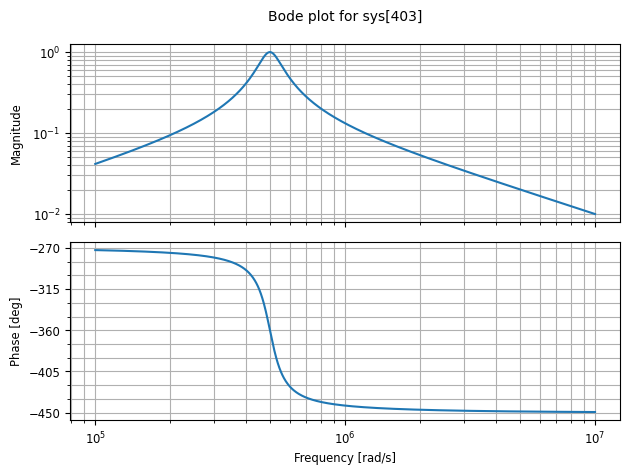

In [667]:
ctrl.bode(G_s)

In [668]:
fmax = 1e7 / (2*np.pi)
fs = fmax * 4
dt = 1 / fs
step_time = dt

t = np.arange(0, 5e-4, dt)

u = np.ones_like(t)
u[t >= step_time] = 0

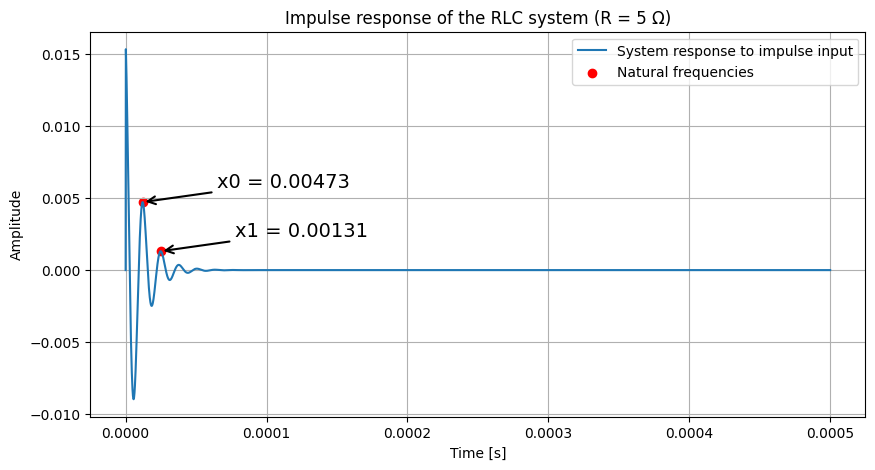

In [669]:
t_out, y_5 = ctrl.forced_response(G_s_5, T=t, U=u)
peaks, _ = find_peaks(y_5, height=0.001)

plt.figure(figsize=(10, 5))

plt.plot(t_out, y_5, label='System response to impulse input')
plt.scatter([t_out[peaks[1]], t_out[peaks[2]]], [y_5[peaks[1]], y_5[peaks[2]]], c='r', label='Natural frequencies')
for i, peak in enumerate(peaks[1:3]):
    plt.annotate(f'x{i} = {y_5[peak]:.5f}',
                 xy=(t_out[peak], y_5[peak]),
                 xytext=(t_out[peak] + 0.0001, y_5[peak] + 0.001),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
                 fontsize=14,
                 ha='center')
    
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Impulse response of the RLC system (R = 5 Ω)')
plt.legend()
plt.grid()

plt.show()

In [670]:
x_0 = y_5[peaks[1]]
x_1 = y_5[peaks[2]]

epsilon = np.log(x_0/x_1) / (2*np.pi)
epsilon

np.float64(0.20417266687686317)

### R = 100 Ohm

In [671]:
R = 100
C = 1e-6
L = 4e-6

numerator = [L, 0]
denominator = [R*L*C, L, R]

G_s_100 = ctrl.TransferFunction(numerator, denominator)

print(G_s_100)

<TransferFunction>: sys[411]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         4e-06 s
-------------------------
4e-10 s^2 + 4e-06 s + 100



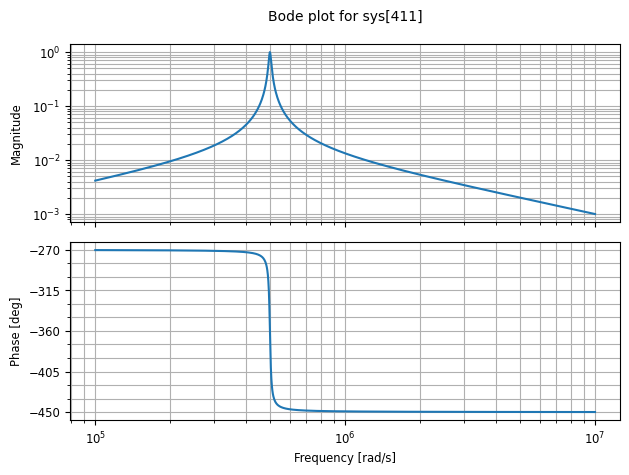

In [672]:
ctrl.bode(G_s_100)

In [673]:
fmax = 1e7 / (2*np.pi)
fs = fmax * 4
dt = 1 / fs
step_time = dt

t = np.arange(0, 5e-4, dt)

u = np.ones_like(t)
u[t >= step_time] = 0

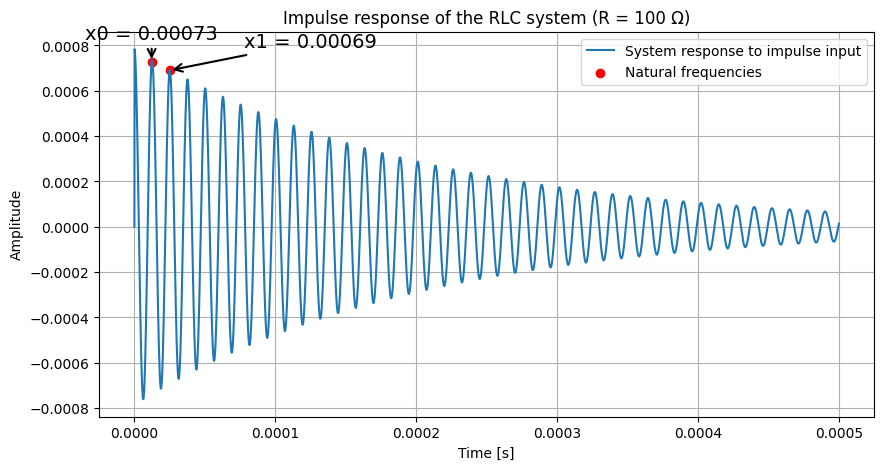

In [674]:
t_out, y_100 = ctrl.forced_response(G_s_100, T=t, U=u)
peaks, _ = find_peaks(y, height=0.001)

plt.figure(figsize=(10, 5))

plt.plot(t_out, y_100, label='System response to impulse input')
plt.scatter([t_out[peaks[1]], t_out[peaks[2]]], [y_100[peaks[1]], y_100[peaks[2]]], c='r', label='Natural frequencies')
for i, peak in enumerate(peaks[1:3]):
    plt.annotate(f'x{i} = {y_100[peak]:.5f}',
                 xy=(t_out[peak], y_100[peak]),
                 xytext=(t_out[peak] + 0.0001*i, y_100[peak] + 0.0001),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
                 fontsize=14,
                 ha='center')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Impulse response of the RLC system (R = 100 Ω)')
plt.legend()
plt.grid()

plt.show()


In [675]:
x_0 = y_100[peaks[1]]
x_1 = y_100[peaks[2]]

epsilon = np.log(x_0/x_1) / (2*np.pi)
epsilon

np.float64(0.008440066696644849)

### Critical Damping for the Approximate Value of R

In [676]:
R = 0.1
C = 1e-6
L = 4e-6

numerator = [L, 0]
denominator = [R*L*C, L, R]

G_s_crit = ctrl.TransferFunction(numerator, denominator)

print(G_s_crit)

<TransferFunction>: sys[414]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         4e-06 s
-------------------------
4e-13 s^2 + 4e-06 s + 0.1



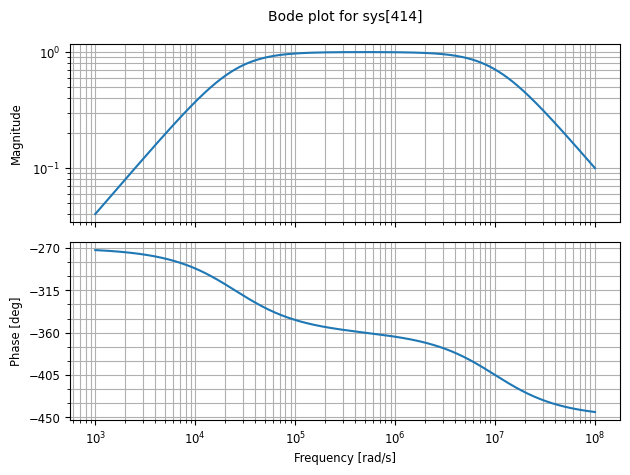

In [677]:
ctrl.bode(G_s_crit)

In [678]:
fmax = 1e8 / (2*np.pi)
fs = fmax * 4
dt = 1 / fs
step_time = dt

t = np.arange(0, 5e-4, dt)

u = np.ones_like(t)
u[t >= step_time] = 0

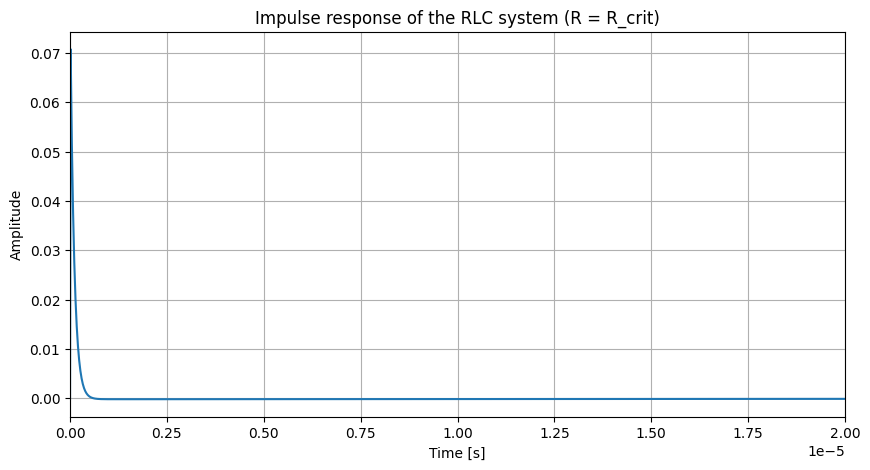

In [679]:
t_out, y_crit = ctrl.forced_response(G_s_crit, T=t, U=u)

plt.figure(figsize=(10, 5))

plt.plot(t_out, y_crit, label='System response to impulse input')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 20e-6)
plt.title('Impulse response of the RLC system (R = R_crit)')
plt.grid()

plt.show()


## Exercsie 2

### Task 2.1

In [680]:
R = 10
C = 1e-6
L = 4e-6

numerator = [L, 0]
denominator = [R*L*C, L, R]

G_s = ctrl.TransferFunction(numerator, denominator)

print(G_s)

<TransferFunction>: sys[417]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        4e-06 s
------------------------
4e-11 s^2 + 4e-06 s + 10



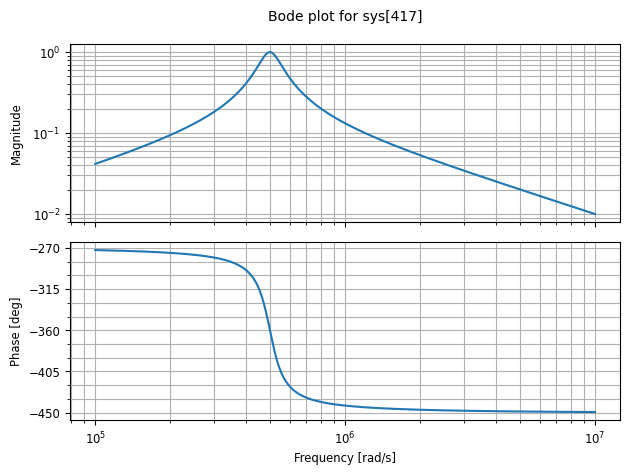

In [681]:
ctrl.bode(G_s)

In [682]:
# Sinus params
A_sin = 1
f_sin = [70e3, 80e3, 90e3]
T_sin = [1 / f for f in f_sin]

# Simulation params
f_max = 1e7 / (2*np.pi)
fs = f_max * 40
dt = 1 / fs

In [683]:
def plot_lines(x_points, y_points, line):
    if line == 'vertical':
        plt.vlines(x_points[0], y_points[0], y_points[1])
        plt.vlines(x_points[1], y_points[0], y_points[1])
        
        plt.annotate('',
                     xy=(x_points[0], y_points[1]),
                     xytext=(x_points[0] + 0.0002, y_points[1]),
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))
        plt.text(x_points[1] + 3e-5, y_points[1] + 0.03, f'Time shift: {(x_points[0] - x_points[1]):.9f}s')

    else:
        plt.hlines(y_points[0], x_points[0], x_points[1])
        plt.hlines(y_points[1], x_points[0], x_points[1])

        y_middle = (y_points[0] + y_points[1]) / 2
        plt.annotate('', xy=(x_points[1], y_points[0]), xytext=(x_points[1], y_points[1]),
                     arrowprops=dict(facecolor='black', arrowstyle='<->', lw=1.5))
        plt.text(x_points[1] - 0.00001, y_middle, f'2x Amplitude: {abs(y_points[1] - y_points[0]):.4f}', rotation=90, va='center')

Experimental phase shift (f = 70000.0 Hz): 52.25 degrees


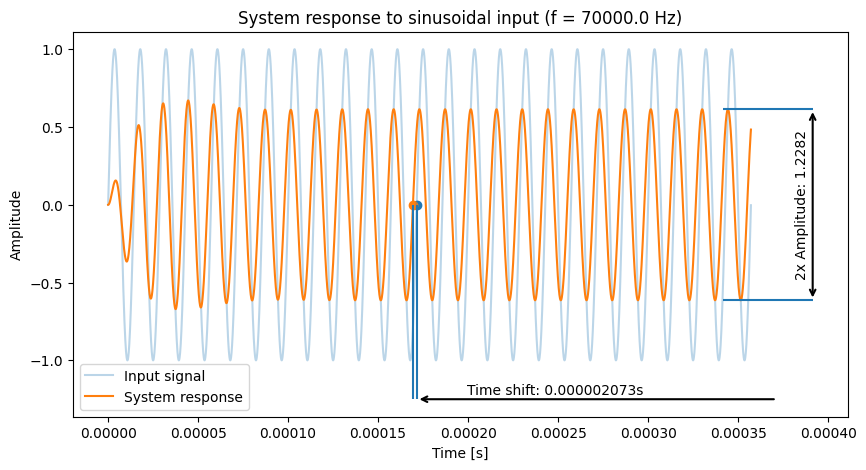

Experimental phase shift (f = 80000.0 Hz): -2.71 degrees


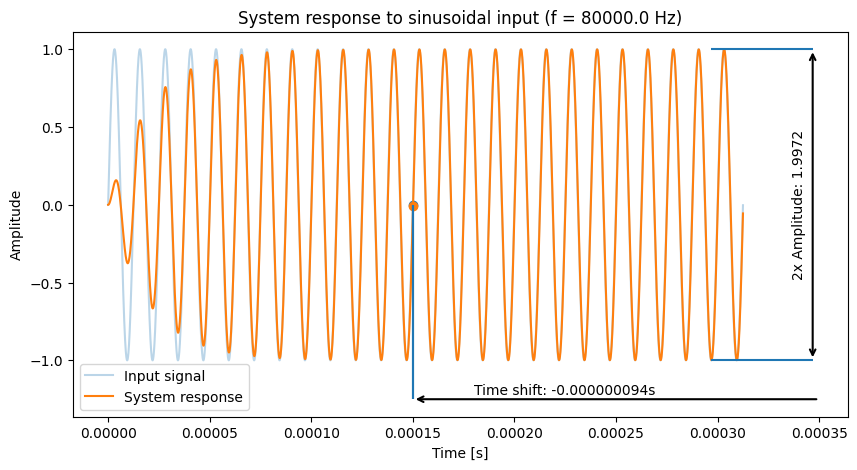

Experimental phase shift (f = 90000.0 Hz): -50.89 degrees


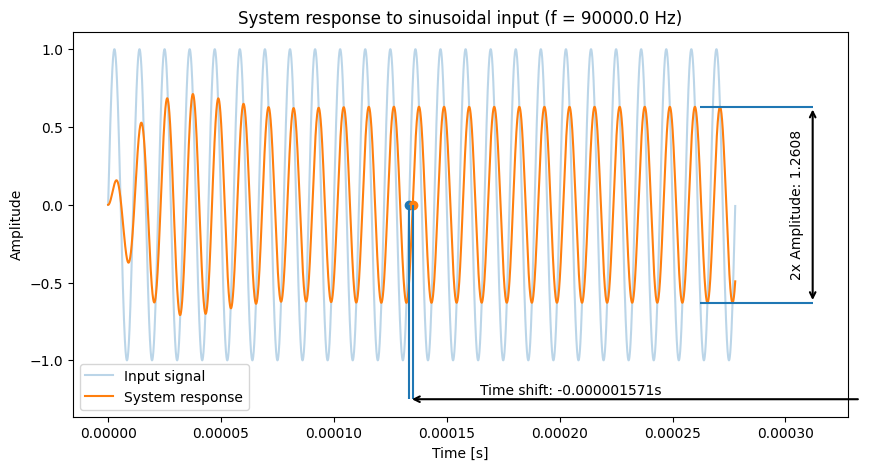

In [684]:
for i in range(len(f_sin)):
    plt.figure(figsize=(10, 5))

    t = np.arange(0, 25 * T_sin[i], dt)
    u_sin = A_sin * np.sin(2 * np.pi * f_sin[i] * t)
    t_out, y = ctrl.forced_response(G_s, T=t, U=u_sin)

    plt.plot(t, u_sin, alpha=0.3, label='Input signal')
    plt.plot(t_out, y, label='System response')

    # Steady State
    steady_state_idx = round(10 * T_sin[i] * fs)

    # Output amplitude
    y_max = y[steady_state_idx:].max()
    y_min = y[steady_state_idx:].min()
    amp_out = (y_max - y_min) / 2
    plot_lines([t_out[-1000], t_out[-1000] + 0.00005], [y_min, y_max], line='horizontal')

    # Phase Shift
    u_zero_mask = np.where((u_sin[:-1] < 0) & (u_sin[1:] >= 0))[0]    # Input signal crosses zero
    u_zero_mask = u_zero_mask[steady_state_idx + 1000 < u_zero_mask]  # Zero-crossings after steady state

    y_zero_mask = np.where((y[:-1] < 0) & (y[1:] >= 0))[0]            # Output signal crosses zero
    y_zero_mask = y_zero_mask[steady_state_idx + 1000 < y_zero_mask]

    t_u_zero = t[u_zero_mask[0]]
    t_y_zero = t[y_zero_mask[0]]
    plt.scatter(t_u_zero, u_sin[u_zero_mask[0]])
    plt.scatter(t_y_zero, y[y_zero_mask[0]])
    plot_lines([t_u_zero, t_y_zero], [0, -1.25], line='vertical')
    
    dt_shift = t_u_zero - t_y_zero
    phase_shift = 360 * (dt_shift / T_sin[i])
    print(f'Experimental phase shift (f = {f_sin[i]} Hz): {phase_shift:.2f} degrees')

    plt.legend()
    plt.title(f'System response to sinusoidal input (f = {f_sin[i]} Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.show()


### Task 2.2

In [685]:
import control as ctrl

R = 10
C = 1e-6
L = 4e-6

numerator = [L, 0]
denominator = [R*L*C, L, R]

G_s = ctrl.TransferFunction(numerator, denominator)

print(G_s)

<TransferFunction>: sys[422]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        4e-06 s
------------------------
4e-11 s^2 + 4e-06 s + 10



In [686]:
fmax = 1e7 / (2*np.pi)
fs = fmax * 40
dt = 1 / fs
step_time = dt

A_sin = 1
f_sin = 70e3
T = 1 / f_sin
t = np.arange(0, 5e-4, dt)
u_sin = A_sin * np.sin(2*np.pi*f_sin*t)

u = np.ones_like(t)
u[t >= step_time] = 0

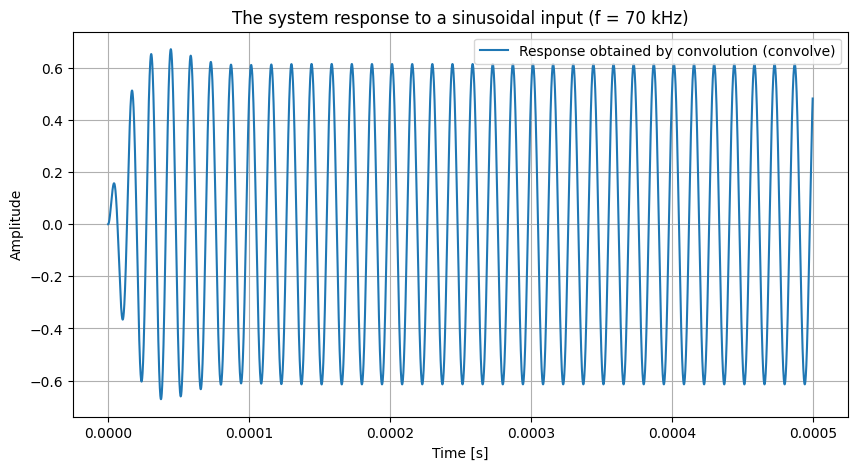

In [689]:
from scipy.signal import convolve

t_out, y_impulse = ctrl.impulse_response(G_s, T=t)

y_conv = convolve(u_sin, y_impulse) * dt
t_conv = np.arange(0, len(y_conv)) * dt

# Adjust time vector length
t_conv = t_conv[:len(t_out)]
y_conv = y_conv[:len(t_out)]

plt.figure(figsize=(10, 5))
plt.plot(t_conv, y_conv, label='Response obtained by convolution (convolve)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('The system response to a sinusoidal input (f = 70 kHz)')
plt.legend()
plt.grid()
plt.show()


The obtained system response using the convolution method matches the result from Task 2.1,  
where the response was calculated directly through time-domain simulation with sinusoidal excitation.  
This confirms the correctness of the impulse response